#  Image Classification Using Deep CNNs

## Importing the Relevant Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

import matplotlib.pyplot

# This is used to manipulate the images given to generate more data artificially and generate batches of data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D 
import keras

from tensorflow.keras.callbacks import EarlyStopping


from tensorflow.keras.models import Sequential,load_model,Model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.initializers import *


import tensorflow as tf 
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

from tensorflow.keras.layers import Activation,Add, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout,GlobalAveragePooling2D

Using TensorFlow backend.


## Specifying the Paths

In [2]:
my_data_dir = 'E:\\IIT K\\Project Image Classification\\image-detect'
my_data_dir_train= "E:\\IIT K\\Project Image Classification\\image-detect\\train"


val_path ='E:\\IIT K\\Project Image Classification\\image-detect\\val\\images\\'
val_txt = 'E:\\IIT K\\Project Image Classification\\image-detect\\val\\val_annotations.txt'

val_data = pd.read_csv('E:\\IIT K\\Project Image Classification\\image-detect\\val\\val_annotations.txt', sep='\t', header=None, names=['File', 'Class', 'X', 'Y', 'H', 'W'])


val_data.drop(['X', 'Y', 'H', 'W'], axis=1, inplace=True)
val_data.head(3)


test_path ='E:\\IIT K\\Project Image Classification\\image-detect\\test'


#os.listdir(my_data_dir) 

## Reading the Image Files

In [3]:
# A random image
para_cell = my_data_dir+'\\train\\n01629819\\images\\'+ 'n01629819_0.JPEG'

In [4]:
para_cell1 = my_data_dir+'\\test\\images\\'+ 'test_0.JPEG'

In [5]:
# Reading the image using matplotlib.imread
para_img = imread(para_cell1)

In [6]:
#plt.imshow(para_img )
#para_img.shape

In [7]:
image_shape = (128,128,3)

In [8]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest',
                               
                               # Fill in missing pixels with the nearest filled value
                               #brightness_range = [0.5,0.5]
                              )

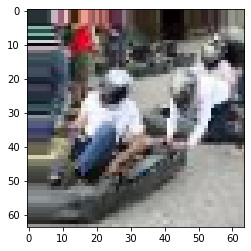

In [9]:
# A random transformation of the image
plt.imshow(image_gen.random_transform(para_img))

In [10]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [11]:
# This reads the given directory and treats the files as individual classes
train_image_gen = image_gen.flow_from_directory(my_data_dir_train,
                                                target_size=(200,200),
                                                color_mode='rgb',
                                                batch_size=32,
                                                class_mode ='categorical'
                                               )

Found 90000 images belonging to 200 classes.


In [12]:
label_map = (train_image_gen.class_indices)
#label_map

In [13]:
val_image_gen = image_gen.flow_from_dataframe(val_data, 
                                              directory='E:\\IIT K\\Project Image Classification\\image-detect\\val\\images\\', 
                                              x_col='File', y_col='Class', 
                                              target_size=(200, 200),
                                              color_mode='rgb', 
                                              class_mode='categorical', 
                                              batch_size=32, 
                                              shuffle=True, 
                                              )

Found 10000 validated image filenames belonging to 200 classes.


## Specifying the Base Model

In [14]:
#base_model = tf.keras.applications.ResNet101V2(include_top=False, weights='imagenet',input_shape=(64,64,3), classes=200)

base_model = tf.keras.applications.InceptionResNetV2(include_top=False, weights='imagenet',input_shape=(200,200,3), classes=200)


In [15]:
vgg_output = base_model.output
vgg_output  = GlobalAveragePooling2D()(vgg_output)

output = tf.keras.layers.Dense(200, activation="softmax")(vgg_output)
model = tf.keras.models.Model(inputs=base_model.inputs, outputs=output)

In [16]:
base_model.trainable = False

## Model Compilation

In [17]:
opt =tf.keras.optimizers.Adam(lr=0.00005)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

## Model Fitting

In [19]:
results = model.fit_generator(train_image_gen, epochs=100,
                              validation_data=val_image_gen,
                              callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
2813/2813 [==============================] - 1183s 421ms/step - loss: 3.5808 - accuracy: 0.3025 - val_loss: 2.6018 - val_accuracy: 0.4529
Epoch 2/100
2813/2813 [==============================] - 1197s 426ms/step - loss: 2.4273 - accuracy: 0.4710 - val_loss: 2.2944 - val_accuracy: 0.4914
Epoch 3/100
2813/2813 [==============================] - 1209s 430ms/step - loss: 2.2184 - accuracy: 0.5020 - val_loss: 2.1654 - val_accuracy: 0.5094
Epoch 4/100
2813/2813 [==============================] - 1186s 422ms/step - loss: 2.1242 - accuracy: 0.5160 - val_loss: 2.1172 - val_accuracy: 0.5140
Epoch 5/100
2813/2813 [==============================] - 1588s 564ms/step - loss: 2.0579 - accuracy: 0.5277 - val_loss: 2.0690 - val_accuracy: 0.5254
Epoch 6/100
2813/2813 [==============================] - 1424s 506ms/step - loss: 2.0115 - accuracy: 0.5378 - val_loss: 2.0105 - val_accuracy: 0.5405
Epoch 7/100
2813/2813 [=

## Saving the Model

In [20]:
version = 73
export_path = os.path.join('E:\\IIT K\\Project Image Classification\\', str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

export_path = E:\IIT K\Project Image Classification\73

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: E:\IIT K\Project Image Classification\73\assets


 ## Estimating Loses and Plotting

In [21]:
losses = pd.DataFrame(model.history.history)

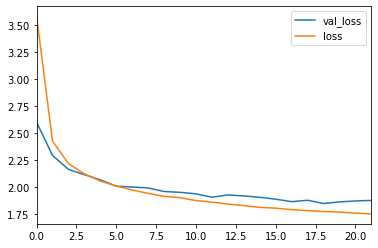

In [22]:
losses[['val_loss','loss']].plot()

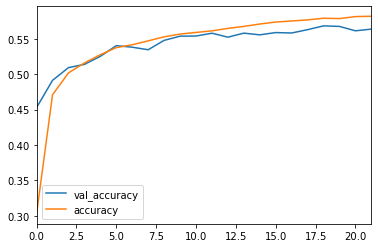

In [30]:
losses[['val_accuracy','accuracy']].plot()

## Generating the Test Image Data for the Model

In [23]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=(200,200),
                                                color_mode='rgb',
                                                class_mode =None,
                                                shuffle=False, 
                                               )

Found 10000 images belonging to 1 classes.


In [24]:
image_names = os.listdir("E:\\IIT K\\Project Image Classification\\image-detect\\test\\images") 
#image_names

## Test Predictions

In [25]:
test_predictions = model.predict(test_image_gen)

In [26]:
y_classes = test_predictions.argmax(axis=-1)
print(y_classes)

[133  40 159 ... 135  19  61]


In [27]:
label_map = dict((v,k) for k,v in label_map.items()) #flip k,v
predictions = [label_map[k] for k in y_classes]

## Saving the Text File 

In [28]:
outfile = open('test77_ML.txt','w')

for i in range(len(image_names)):
    outp1 = image_names[i]
    outp2 = ","
    outp3 = predictions[i]
    outp = str(outp1) + outp2 + str(outp3) + "\n"

    outfile.write(outp)

outfile.close()

In [29]:
#print(predictions)